In [1]:
import argparse
import torch
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from datasets_prep.lsun import LSUN
from datasets_prep.stackmnist_data import StackedMNIST, _data_transforms_stacked_mnist
from datasets_prep.lmdb_datasets import LMDBDataset


from torch.multiprocessing import Process
import torch.distributed as dist
import shutil

In [2]:
gpu = 0
device = torch.device('cuda:{}'.format(gpu))
print(device)
batch_size = 64

cuda:0


In [3]:
dataset = CIFAR10('./data', train=True, transform=transforms.Compose([
                        transforms.Resize(32),
                        transforms.RandomHorizontalFlip(),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))]), download=True)

Files already downloaded and verified


In [4]:
data_loader = torch.utils.data.DataLoader(dataset,
                                               batch_size=50,
                                               shuffle=False,
                                               num_workers=4,
                                               pin_memory=True,
                                               drop_last = True)

In [5]:
for iteration, (x, y) in enumerate(data_loader):
    print(iteration, x.shape, y.shape)
    t = x

0 torch.Size([50, 3, 32, 32]) torch.Size([50])
1 torch.Size([50, 3, 32, 32]) torch.Size([50])
2 torch.Size([50, 3, 32, 32]) torch.Size([50])
3 torch.Size([50, 3, 32, 32]) torch.Size([50])
4 torch.Size([50, 3, 32, 32]) torch.Size([50])
5 torch.Size([50, 3, 32, 32]) torch.Size([50])
6 torch.Size([50, 3, 32, 32]) torch.Size([50])
7 torch.Size([50, 3, 32, 32]) torch.Size([50])
8 torch.Size([50, 3, 32, 32]) torch.Size([50])
9 torch.Size([50, 3, 32, 32]) torch.Size([50])
10 torch.Size([50, 3, 32, 32]) torch.Size([50])
11 torch.Size([50, 3, 32, 32]) torch.Size([50])
12 torch.Size([50, 3, 32, 32]) torch.Size([50])
13 torch.Size([50, 3, 32, 32]) torch.Size([50])
14 torch.Size([50, 3, 32, 32]) torch.Size([50])
15 torch.Size([50, 3, 32, 32]) torch.Size([50])
16 torch.Size([50, 3, 32, 32]) torch.Size([50])
17 torch.Size([50, 3, 32, 32]) torch.Size([50])
18 torch.Size([50, 3, 32, 32]) torch.Size([50])
19 torch.Size([50, 3, 32, 32]) torch.Size([50])
20 torch.Size([50, 3, 32, 32]) torch.Size([50])
21

212 torch.Size([50, 3, 32, 32]) torch.Size([50])
213 torch.Size([50, 3, 32, 32]) torch.Size([50])
214 torch.Size([50, 3, 32, 32]) torch.Size([50])
215 torch.Size([50, 3, 32, 32]) torch.Size([50])
216 torch.Size([50, 3, 32, 32]) torch.Size([50])
217 torch.Size([50, 3, 32, 32]) torch.Size([50])
218 torch.Size([50, 3, 32, 32]) torch.Size([50])
219 torch.Size([50, 3, 32, 32]) torch.Size([50])
220 torch.Size([50, 3, 32, 32]) torch.Size([50])
221 torch.Size([50, 3, 32, 32]) torch.Size([50])
222 torch.Size([50, 3, 32, 32]) torch.Size([50])
223 torch.Size([50, 3, 32, 32]) torch.Size([50])
224 torch.Size([50, 3, 32, 32]) torch.Size([50])
225 torch.Size([50, 3, 32, 32]) torch.Size([50])
226 torch.Size([50, 3, 32, 32]) torch.Size([50])
227 torch.Size([50, 3, 32, 32]) torch.Size([50])
228 torch.Size([50, 3, 32, 32]) torch.Size([50])
229 torch.Size([50, 3, 32, 32]) torch.Size([50])
230 torch.Size([50, 3, 32, 32]) torch.Size([50])
231 torch.Size([50, 3, 32, 32]) torch.Size([50])
232 torch.Size([50, 

422 torch.Size([50, 3, 32, 32]) torch.Size([50])
423 torch.Size([50, 3, 32, 32]) torch.Size([50])
424 torch.Size([50, 3, 32, 32]) torch.Size([50])
425 torch.Size([50, 3, 32, 32]) torch.Size([50])
426 torch.Size([50, 3, 32, 32]) torch.Size([50])
427 torch.Size([50, 3, 32, 32]) torch.Size([50])
428 torch.Size([50, 3, 32, 32]) torch.Size([50])
429 torch.Size([50, 3, 32, 32]) torch.Size([50])
430 torch.Size([50, 3, 32, 32]) torch.Size([50])
431 torch.Size([50, 3, 32, 32]) torch.Size([50])
432 torch.Size([50, 3, 32, 32]) torch.Size([50])
433 torch.Size([50, 3, 32, 32]) torch.Size([50])
434 torch.Size([50, 3, 32, 32]) torch.Size([50])
435 torch.Size([50, 3, 32, 32]) torch.Size([50])
436 torch.Size([50, 3, 32, 32]) torch.Size([50])
437 torch.Size([50, 3, 32, 32]) torch.Size([50])
438 torch.Size([50, 3, 32, 32]) torch.Size([50])
439 torch.Size([50, 3, 32, 32]) torch.Size([50])
440 torch.Size([50, 3, 32, 32]) torch.Size([50])
441 torch.Size([50, 3, 32, 32]) torch.Size([50])
442 torch.Size([50, 

625 torch.Size([50, 3, 32, 32]) torch.Size([50])
626 torch.Size([50, 3, 32, 32]) torch.Size([50])
627 torch.Size([50, 3, 32, 32]) torch.Size([50])
628 torch.Size([50, 3, 32, 32]) torch.Size([50])
629 torch.Size([50, 3, 32, 32]) torch.Size([50])
630 torch.Size([50, 3, 32, 32]) torch.Size([50])
631 torch.Size([50, 3, 32, 32]) torch.Size([50])
632 torch.Size([50, 3, 32, 32]) torch.Size([50])
633 torch.Size([50, 3, 32, 32]) torch.Size([50])
634 torch.Size([50, 3, 32, 32]) torch.Size([50])
635 torch.Size([50, 3, 32, 32]) torch.Size([50])
636 torch.Size([50, 3, 32, 32]) torch.Size([50])
637 torch.Size([50, 3, 32, 32]) torch.Size([50])
638 torch.Size([50, 3, 32, 32]) torch.Size([50])
639 torch.Size([50, 3, 32, 32]) torch.Size([50])
640 torch.Size([50, 3, 32, 32]) torch.Size([50])
641 torch.Size([50, 3, 32, 32]) torch.Size([50])
642 torch.Size([50, 3, 32, 32]) torch.Size([50])
643 torch.Size([50, 3, 32, 32]) torch.Size([50])
644 torch.Size([50, 3, 32, 32]) torch.Size([50])
645 torch.Size([50, 

837 torch.Size([50, 3, 32, 32]) torch.Size([50])
838 torch.Size([50, 3, 32, 32]) torch.Size([50])
839 torch.Size([50, 3, 32, 32]) torch.Size([50])
840 torch.Size([50, 3, 32, 32]) torch.Size([50])
841 torch.Size([50, 3, 32, 32]) torch.Size([50])
842 torch.Size([50, 3, 32, 32]) torch.Size([50])
843 torch.Size([50, 3, 32, 32]) torch.Size([50])
844 torch.Size([50, 3, 32, 32]) torch.Size([50])
845 torch.Size([50, 3, 32, 32]) torch.Size([50])
846 torch.Size([50, 3, 32, 32]) torch.Size([50])
847 torch.Size([50, 3, 32, 32]) torch.Size([50])
848 torch.Size([50, 3, 32, 32]) torch.Size([50])
849 torch.Size([50, 3, 32, 32]) torch.Size([50])
850 torch.Size([50, 3, 32, 32]) torch.Size([50])
851 torch.Size([50, 3, 32, 32]) torch.Size([50])
852 torch.Size([50, 3, 32, 32]) torch.Size([50])
853 torch.Size([50, 3, 32, 32]) torch.Size([50])
854 torch.Size([50, 3, 32, 32]) torch.Size([50])
855 torch.Size([50, 3, 32, 32]) torch.Size([50])
856 torch.Size([50, 3, 32, 32]) torch.Size([50])
857 torch.Size([50, 

In [6]:
from  torch.nn.modules.upsampling import Upsample
m = Upsample(scale_factor=4, mode='nearest')

In [7]:
x_upsampled = m(t)
print(t.shape, x_upsampled.shape)

torch.Size([50, 3, 32, 32]) torch.Size([50, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


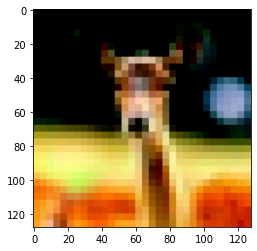

In [8]:
img = x_upsampled[1]
#img = torch.reshape(img, (112, 112, 3))
img = torch.permute(img, (1, 2, 0))

#Normalized image
plt.imshow(img)
plt.show()

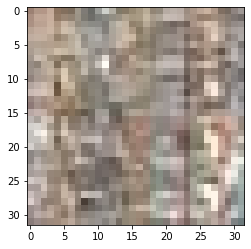

In [13]:
img_bgr = cv2.imread('6.jpg')
img_bgr.shape
plt.imshow(img_bgr)
plt.show()

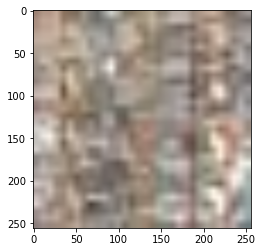

In [16]:
img_stretch = cv2.resize(img_bgr, (256, 256), interpolation = cv2.INTER_LINEAR)
plt.imshow(img_stretch)
plt.show()

In [26]:
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

In [7]:
train_transform = transforms.Compose([
                transforms.Resize(256),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
            ])

In [32]:
root_dir = 'C:\\Users\\subir\\Downloads\\celebahq256_imgs'
train = os.path.join(root_dir, 'train')
val = os.path.join(root_dir, 'valid')

In [33]:
train

'C:\\Users\\subir\\Downloads\\celebahq256_imgs\\train'

In [34]:
train_dataset = ImageFolder(root=train, transform=train_transform)

In [35]:
val_dataset = ImageFolder(root=val, transform=train_transform)

In [23]:
dataset

Dataset ImageFolder
    Number of datapoints: 30000
    Root location: C:\Users\subir\Downloads\celebahq256_imgs
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [36]:
len(train_dataset), len(val_dataset)

(27000, 3000)

In [37]:
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=False, 
                                                num_workers=4, pin_memory=True, drop_last = True)

val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=10, shuffle=False, 
                                                num_workers=4, pin_memory=True, drop_last = True)

In [38]:
for iteration, (x, y) in enumerate(train_data_loader):
    print(iteration, x.shape, y.shape)
    print(y)
    break

0 torch.Size([10, 3, 256, 256]) torch.Size([10])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [39]:
for iteration, (x, y) in enumerate(val_data_loader):
    print(iteration, x.shape, y.shape)
    print(y)
    break

0 torch.Size([10, 3, 256, 256]) torch.Size([10])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [1]:
import numpy as np
import os
import io
from PIL import Image
from torch.utils.data import random_split, DataLoader, Dataset

In [ ]:
class CelebA_HQ(Dataset):
    def __init__(self, root, name='', train=True, transform=None):
        super(CelebA_HQ, self).__init__()
        self.train = train
        self.name = name
        self.transform = transform
        if self.train:
            path = os.path.join(root, 'train')
        else:
            path = os.path.join(root, 'valid')

    def __getitem__(self, index):
        target = [0]
        
        with self.data_lmdb.begin(write=False, buffers=True) as txn:
            data = txn.get(str(index).encode())
            if self.is_encoded:
                img = Image.open(io.BytesIO(data))
                img = img.convert('RGB')
            else:
                img = np.asarray(data, dtype=np.uint8)
                # assume data is RGB
                size = int(np.sqrt(len(img) / 3))
                img = np.reshape(img, (size, size, 3))
                img = Image.fromarray(img, mode='RGB')

        if self.transform is not None:
            img = self.transform(img)

        return img, target

    def __len__(self):
        return self.num_samples(self.name, self.train)
    
    def num_samples(dataset, train):
        if dataset == 'celeba':
            return 27000 if train else 3000
    
        else:
            raise NotImplementedError('dataset %s is unknown' % dataset)